## Importing required libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [64]:
#reading the dataset
data = pd.read_csv("D:/New downloads/stroke_dataset/stroke_data.csv")
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


## Exploratory Data Analysis

In [65]:
#shape of the data
data.shape

(40910, 11)

In [66]:
data['stroke'].value_counts()

1    20460
0    20450
Name: stroke, dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [68]:
#There are 3 rows that are missing a value in the "sex" column - because of the negligible count, we will just drop it
# Drop rows with NaN values in the 'sex' column
data = data.dropna(subset=["sex"])

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

In [69]:
#Check if there are NA values.
data.isnull().sum().any()

False

In [15]:
#Check if there are duplicate values.
data.duplicated().sum()

0

In [16]:
# Now, there is no missing/duplicate data.
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555121,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496958,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [17]:
# To analyze the data in a better way, we decided to convert the coding to the real values.

In [21]:
data_vis = data.copy()
data_vis.sex[data_vis['sex'] == 0] = 'Female'
data_vis.sex[data_vis['sex'] == 1] = 'Male'

data_vis.hypertension[data_vis['hypertension'] == 0] = 'Not had hypertension'
data_vis.hypertension[data_vis['hypertension'] == 1] = 'Had hypertension'

data_vis.heart_disease[data_vis['heart_disease'] == 0] = 'Not had heart disease'
data_vis.heart_disease[data_vis['heart_disease'] == 1] = 'Had heart disease'

data_vis.ever_married[data_vis['ever_married'] == 0] = 'No'
data_vis.ever_married[data_vis['ever_married'] == 1] = 'Yes'

data_vis.work_type[data_vis['work_type'] == 0] = 'Never worked'
data_vis.work_type[data_vis['work_type'] == 1] = 'Children'
data_vis.work_type[data_vis['work_type'] == 2] = 'Govt job'
data_vis.work_type[data_vis['work_type'] == 3] = 'Self-employed'
data_vis.work_type[data_vis['work_type'] == 4] = 'Private'

data_vis.Residence_type[data_vis['Residence_type'] == 0] = 'Urban'
data_vis.Residence_type[data_vis['Residence_type'] == 1] = 'Rural'

data_vis.smoking_status[data_vis['smoking_status'] == 0] = 'Never smoked'
data_vis.smoking_status[data_vis['smoking_status'] == 1] = 'Smokes'

data_vis.stroke[data_vis['stroke'] == 0] = 'No'
data_vis.stroke[data_vis['stroke'] == 1] = 'Yes'

<ipython-input-21-2a54aebfa123>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vis.sex[data_vis['sex'] == 0] = 'Female'
<ipython-input-21-2a54aebfa123>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vis.hypertension[data_vis['hypertension'] == 0] = 'Not had hypertension'
<ipython-input-21-2a54aebfa123>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vis.heart_disease[data_vis['heart_disease'] == 0] = 'Not had heart 

In [22]:
unique_values = {}
for col in data_vis.columns:
    unique_values[col] = data_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
sex,2
age,111
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,2903
bmi,370
smoking_status,2


In [ ]:
# The "work_type" column will need One Hot Encoder to process in nominal categorical data.
# "age", "avg_glucose_level" and "bmi" columns can be processed using Binning or Scaling.

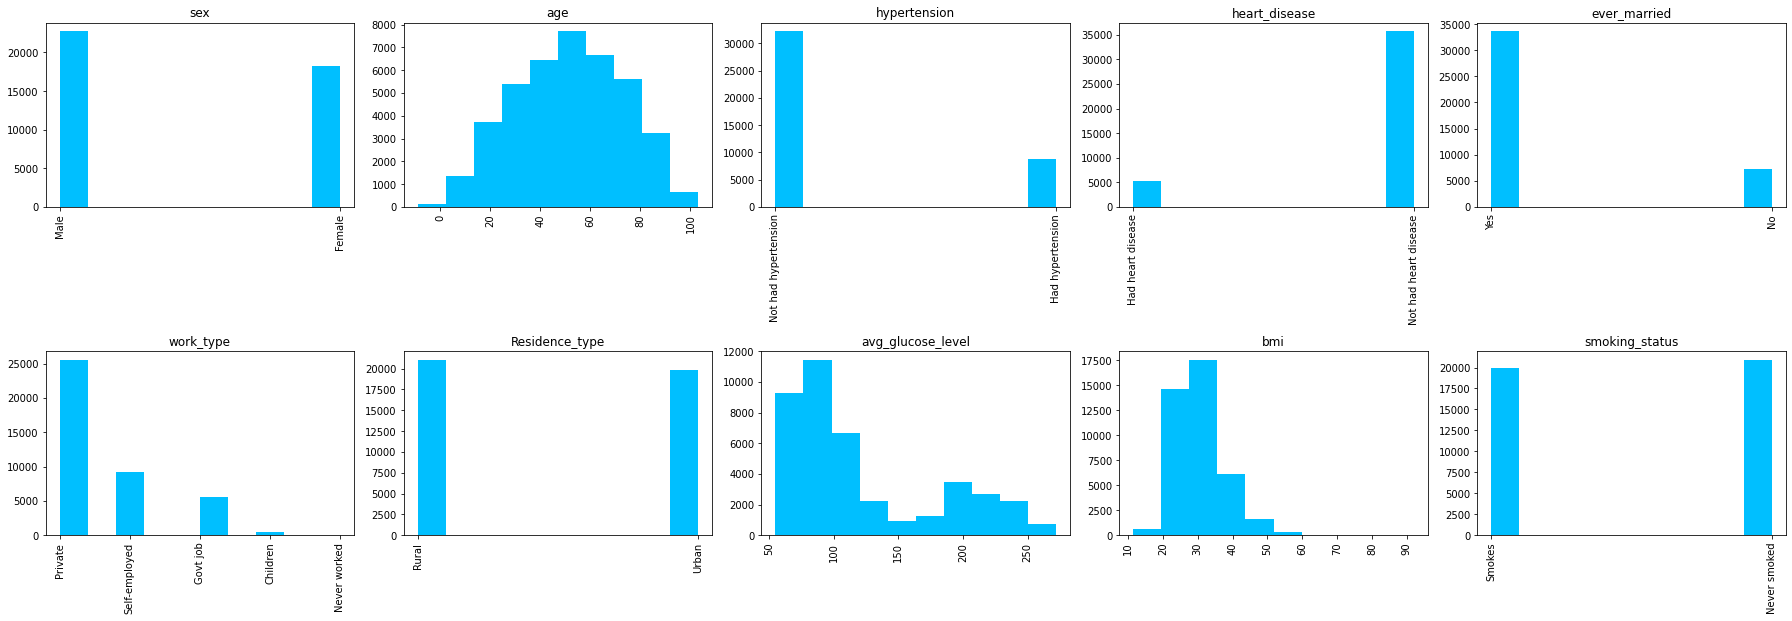

In [24]:
# Frequency of the value of the features in the dataset
feature_cols = [x for x in data_vis.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(data_vis[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

In [26]:
# There can't be a negative age, so lets drop these rows
data = data.drop(data[data.age < 0].index)
data_vis = data_vis.drop(data_vis[data_vis.age < 0].index)
len(data.index)

40852

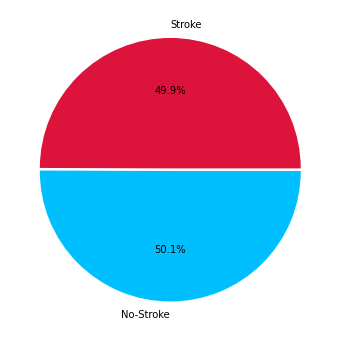

In [27]:
# We dropped 58 rows
# Traget values frequency
plt.figure(figsize=(8,6))
labels = ['Stroke', 'No-Stroke']
sizes = [data_vis['stroke'].value_counts()['Yes'],data_vis['stroke'].value_counts()['No']]
colors = ['crimson', 'deepskyblue']
explode = (0.01,0.01)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = data_vis);

In [28]:
# The prediction column classes are balanced

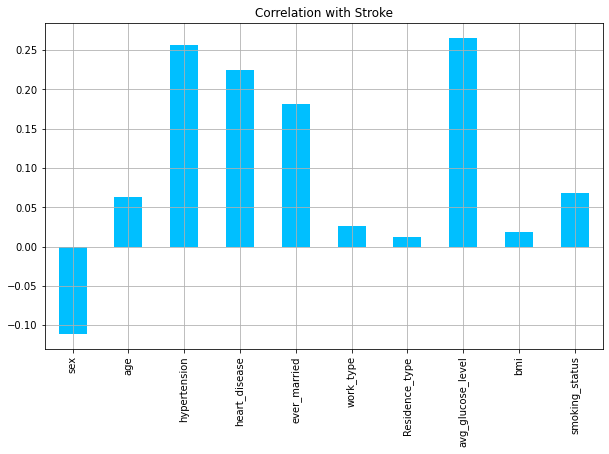

In [29]:
# Correlation between each feature and stroke
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="deepskyblue");

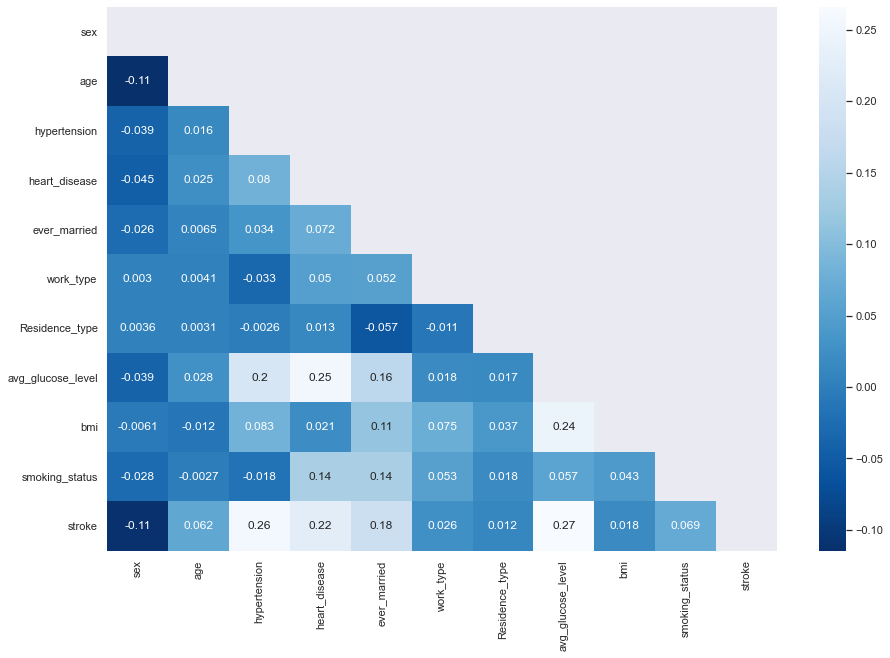

In [31]:
# The features "bmi", "Residence_type", "work_type" are least correlated with Storke. All other features have a significant correlation with Stroke.

# Correlation heatmap
plt.figure(figsize=(15,10))
mask=np.triu(data.corr())
sns.heatmap(data.corr(),mask=mask,annot=True,cmap='Blues_r')
plt.show()

C:\Users\Hari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hari\anaconda3\lib\site-p

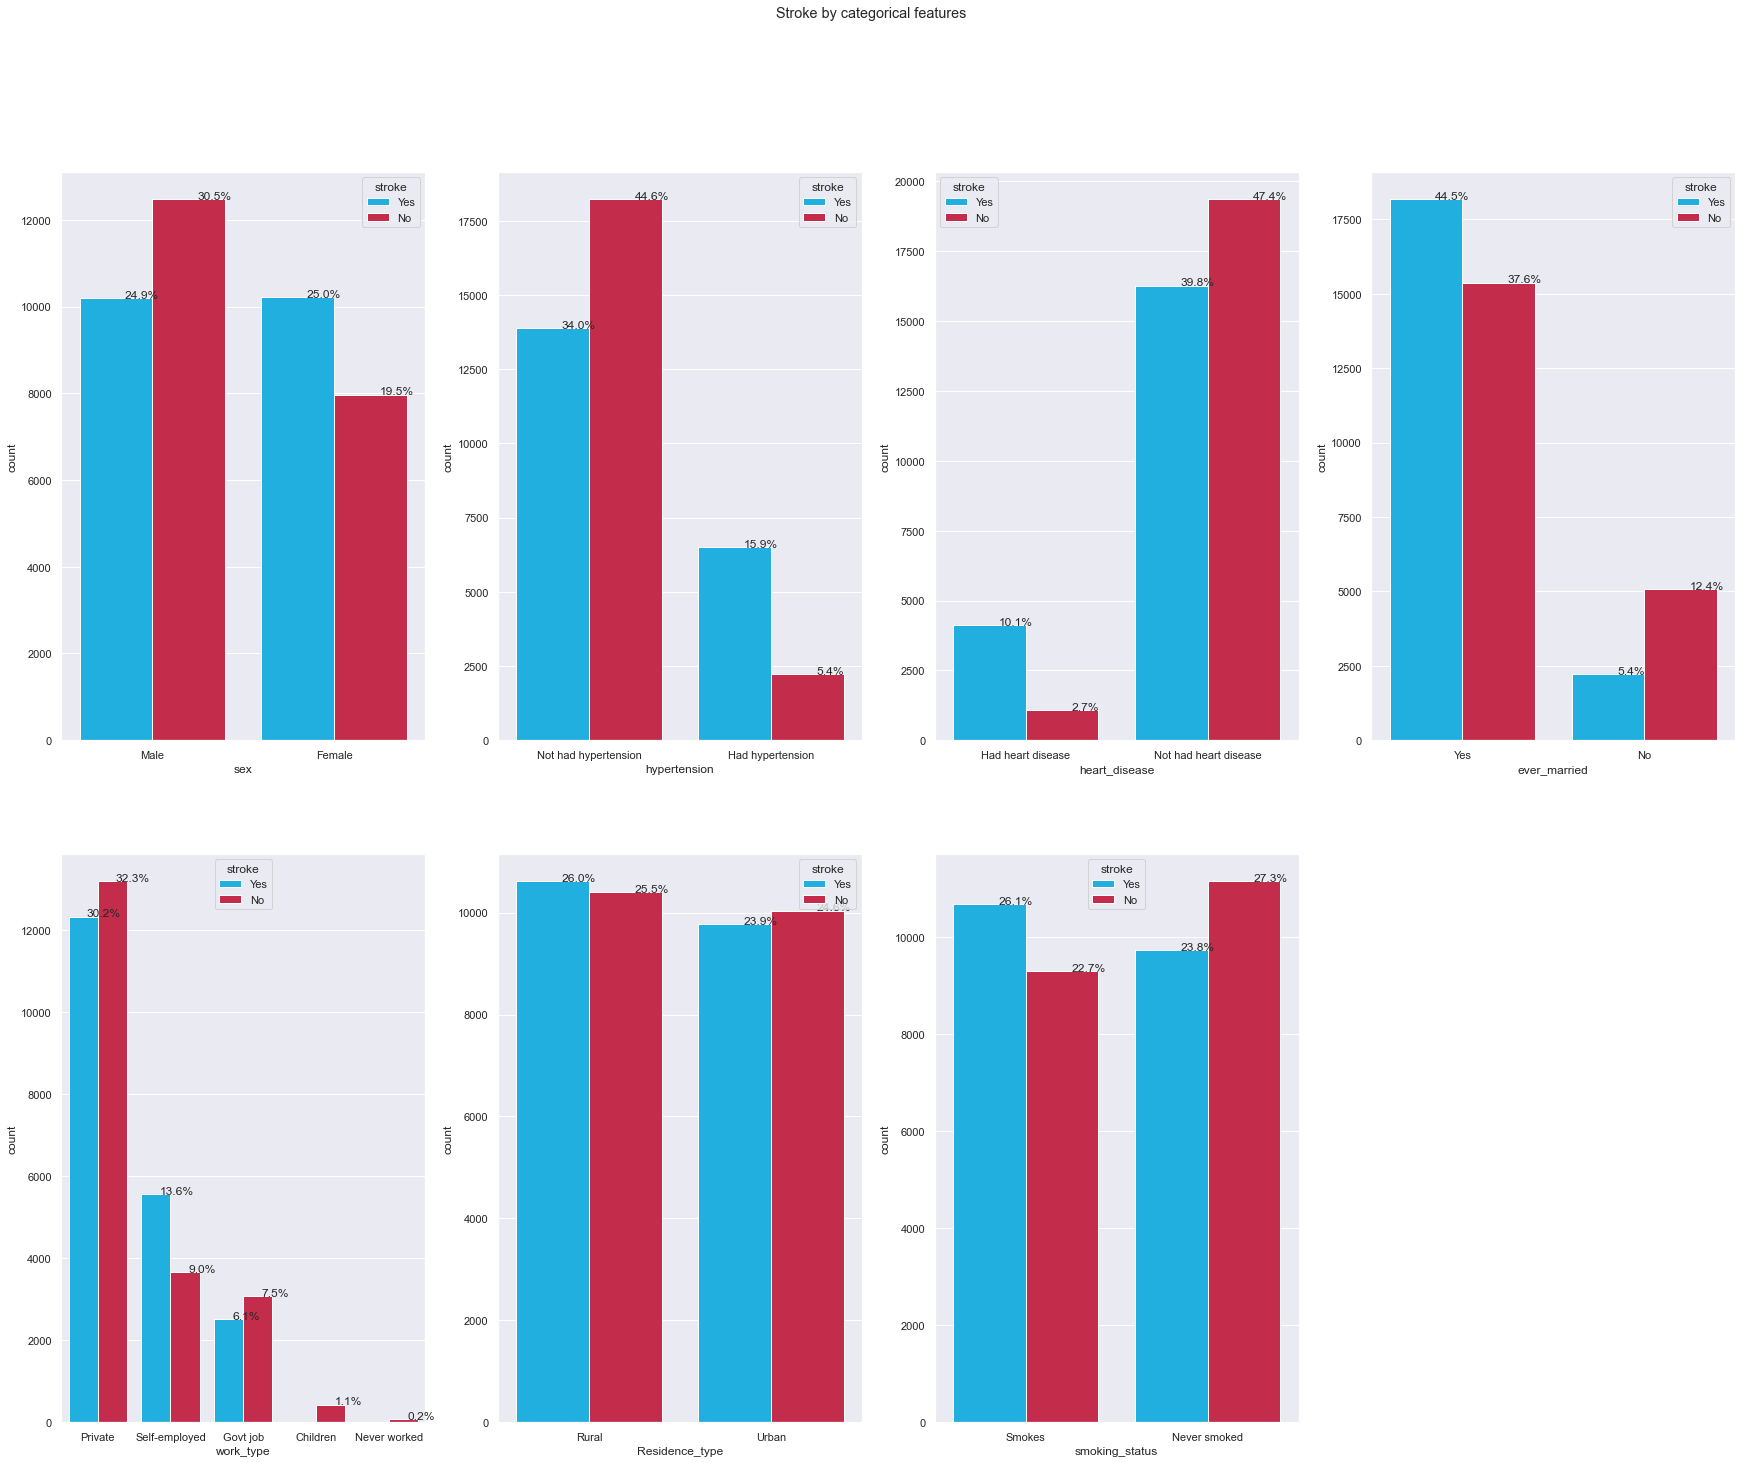

In [32]:
# There is no correlation higher than +- 0.3 for a pair of features. Therefore, we cannot drop features at this time.

# Stroke frequency by categorical features
features = [x for x in data_vis.columns if x not in ['stroke','bmi','age','avg_glucose_level']]
plt.figure(figsize = (30,23))
plt.suptitle('Stroke by categorical features')
#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)
    x = sns.countplot(i[1] ,hue='stroke', data=data_vis, palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/data_vis.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

In [ ]:
# Sex has no effect on stroke.

# Smoking, hypertension and heart disease increase the risk of stroke.

# People whose type of work is "self employee" have a higher risk of stroke than other types of work.
# There is no clear connection between residence type and stroke, but there is a slight tendency to stroke in a rural residence type.


In [35]:
# Stroke frequency by numerical features

# scale the data before pairplot
data_pairplot = data.copy()
float_columns = [x for x in data.columns if x in ['bmi','age','avg_glucose_level']]

sc = StandardScaler()
data_pairplot[float_columns] = sc.fit_transform(data_pairplot[float_columns])
data_pairplot.head(4)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.538279,0,1,1,4,1,1.852569,0.906241,1,1
1,1.0,-0.436529,0,1,1,4,0,-0.280557,0.306405,0,1
2,0.0,0.445440,0,0,1,4,1,0.854203,0.584378,1,1
3,1.0,-0.482949,1,0,1,3,0,0.904417,-0.937158,0,1


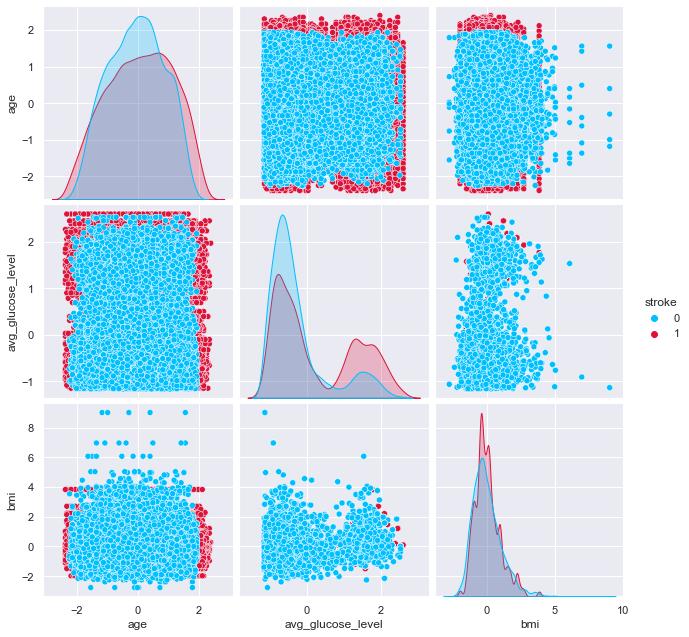

In [36]:
float_columns = [x for x in data_pairplot.columns if x in ['bmi','age','avg_glucose_level']]
sns.set_context('notebook')
sns.pairplot(data_pairplot[float_columns + ['stroke']], 
             hue='stroke', 
             hue_order=[0,1],
             height=3,
             palette={0:'deepskyblue',1:'crimson'});

<Figure size 864x360 with 0 Axes>

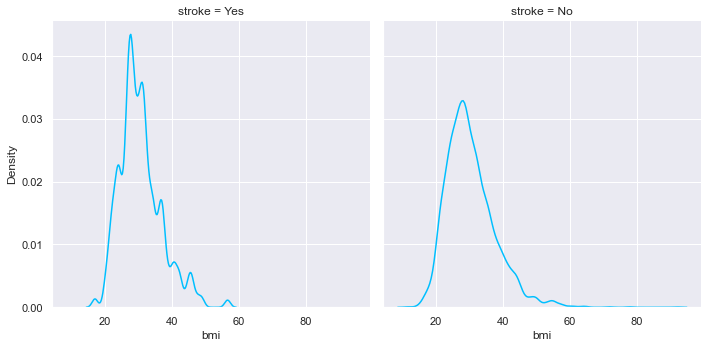

In [37]:
# Combining of float features does not seem to explain stroke.

# Numeric features distributions
# Bmi
plt.figure(figsize=(12,5))
sns.displot(x='bmi', col='stroke' , data = data_vis, kind="kde" ,color = 'deepskyblue');

<Figure size 864x1440 with 0 Axes>

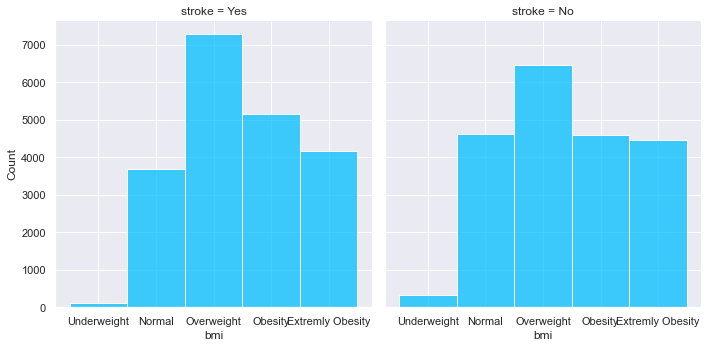

In [40]:
# Binning the data to see the distribution clearly
bmi = pd.cut( data_vis['bmi'],bins=[0,18.5,25,30,35,max(data_vis['bmi'])],labels=['Underweight','Normal','Overweight','Obesity','Extremly Obesity'])
plt.figure(figsize=(12,20))
sns.displot(data=data_vis,col='stroke',x=bmi,color='deepskyblue');

<Figure size 864x360 with 0 Axes>

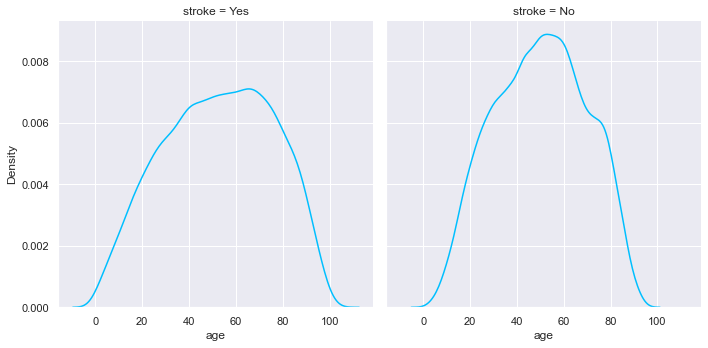

In [41]:
# The bmi's distribution of target column values are similar.

# Age
plt.figure(figsize=(12,5))
sns.displot(x='age', col='stroke' , data = data_vis, kind="kde" ,color = 'deepskyblue');

<Figure size 864x360 with 0 Axes>

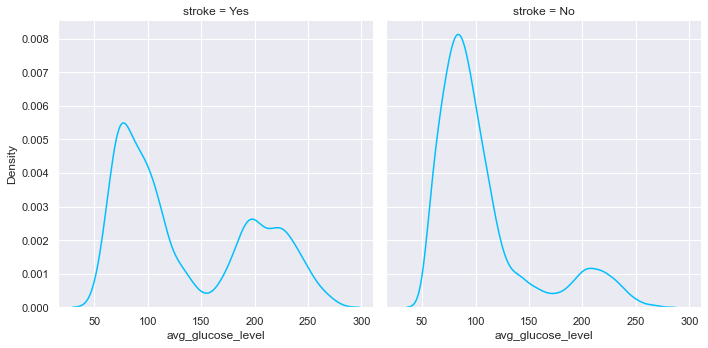

In [54]:
# The age's distribution of target column values are similar.

# avg_glucose_level
plt.figure(figsize=(12,5))
sns.displot(x='avg_glucose_level', col='stroke' , data = data_vis, kind="kde" ,color = 'deepskyblue');

<Figure size 720x432 with 0 Axes>

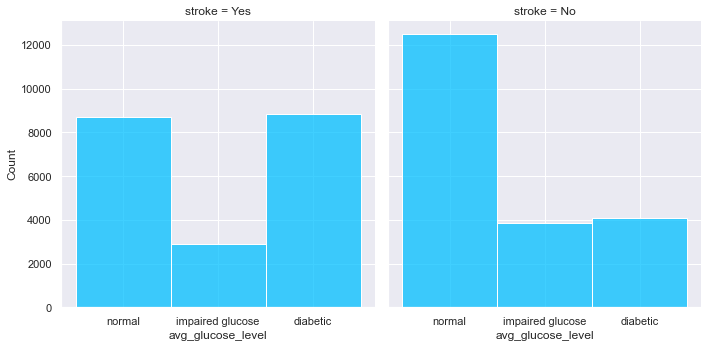

In [56]:
#Binning the data to see the distribution clearly

avg_glucose_level = pd.cut( data_vis['avg_glucose_level'],bins=[0,100,125,max(data_vis['avg_glucose_level'])],labels=['normal','impaired glucose','diabetic'])
plt.figure(figsize=(10,6))
sns.displot(data=data_vis,col='stroke',x=avg_glucose_level,color='deepskyblue');

In [ ]:
# The distribution of the average glucose level of the target column values is different. This feature is an explanatory feature; People with high blood glucose are more likely to have a stroke than those with normal values.

## Data preperation

C:\Users\Hari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


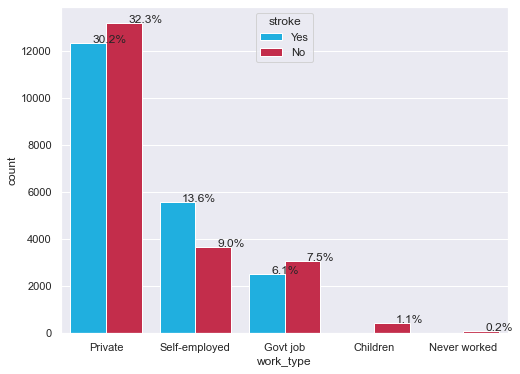

In [70]:
# Drop values with low frequency
# Let's look at the "work_type" feature graph:
plt.figure(figsize=(8,6))
x = sns.countplot("work_type" ,hue='stroke', data=data_vis, palette = ['deepskyblue','crimson'])
for z in x.patches:
    x.annotate('{:.1f}'.format((z.get_height()/data_vis.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

C:\Users\Hari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


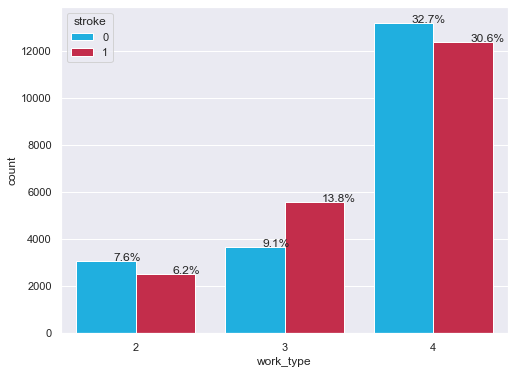

In [71]:
# Only 1.3 percent of the data are divided into the values "children", "never worked". In addition, neither of these two values had a stroke. This data can cause biases, so I will drop these records.

data.drop(data[data.work_type <= 1].index, inplace=True)
plt.figure(figsize=(8,6))
x = sns.countplot("work_type" ,hue='stroke', data=data, palette = ['deepskyblue','crimson'])
for z in x.patches:
    x.annotate('{:.1f}'.format((z.get_height()/data.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

In [72]:
# The "work_type" feature is of the Nominal Variable type. Therefore One Hot Encoder must be performed.

data.work_type[data['work_type'] == 2] = 'Govt job'
data.work_type[data['work_type'] == 3] = 'Self-employed'
data.work_type[data['work_type'] == 4] = 'Private'
one_hot_encode_cols = ['work_type']  # filtering by string categoricals
# Encode these columns as categoricals so one hot encoding works on split data 
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)
data.head()

<ipython-input-72-2cd354ca3d62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.work_type[data['work_type'] == 2] = 'Govt job'


,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,63.0,0,1,1,1,228.69,36.6,1,1,0,1,0
1,1.0,42.0,0,1,1,0,105.92,32.5,0,1,0,1,0
2,0.0,61.0,0,0,1,1,171.23,34.4,1,1,0,1,0
3,1.0,41.0,1,0,1,0,174.12,24.0,0,1,0,0,1
4,1.0,85.0,0,0,1,1,186.21,29.0,1,1,0,1,0


In [73]:
# Skweness check
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.078581,False
avg_glucose_level,0.935493,True
bmi,1.100143,True


In [76]:
# There are 2 columns with high Skewness. Therefore, we will normalize them using the QuantileTransformer method.
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data[['bmi']] = qt.fit_transform(data[['bmi']])
data[['avg_glucose_level']] = qt.fit_transform(data[['avg_glucose_level']])

In [77]:
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.078581,False
avg_glucose_level,0.271436,False
bmi,-0.007024,False


In [79]:
# Now, the columns are not skewed.

# Data Scaling
sc = StandardScaler()
data[['bmi']] = sc.fit_transform(data[['bmi']])
data[['age']] = sc.fit_transform(data[['age']])
data[['avg_glucose_level']] = sc.fit_transform(data[['avg_glucose_level']])
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,0.538676,0,1,1,1,1.445701,0.965016,1,1,0,1,0
1,1.0,-0.431631,0,1,1,0,0.181283,0.491540,0,1,0,1,0
2,0.0,0.446266,0,0,1,1,0.652857,0.721223,1,1,0,1,0
3,1.0,-0.477836,1,0,1,0,0.665212,-1.022001,0,1,0,0,1
4,1.0,1.555188,0,0,1,1,0.751667,-0.065039,1,1,0,1,0


In [80]:
(data[['bmi','age','avg_glucose_level']]).describe()

,bmi,age,avg_glucose_level
count,4.039100e+04,4.039100e+04,4.039100e+04
mean,1.364545e-16,-6.983869e-17,4.487238e-16
std,1.000012e+00,1.000012e+00,1.000012e+00
min,-5.198797e+00,-2.788091e+00,-5.071610e+00
25%,-6.662900e-01,-7.550669e-01,-6.624927e-01
50%,5.330978e-03,3.041980e-02,-3.395298e-03
75%,6.763449e-01,7.697014e-01,6.528567e-01
max,5.199413e+00,2.386880e+00,5.059925e+00


In [83]:
# Data splitting
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
# function that gets y_test and calculates all the relevant metric
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_pred_test # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

## Decision tree

In [86]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [87]:
# Searching for the best model parameters with GridSearchCV
# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 26, 2),
                         'max_features': range(1, 13)})

In [88]:
# Get the best parameters
print(gridDT.best_params_)

{'max_depth': 23, 'max_features': 9}


In [89]:
# Prediction according to this model
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)

In [90]:
# Overfit check
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9984479509256864
0.996549137284321


In [ ]:
# There is no overfitting, as the model is performing well on both the train data and the test data

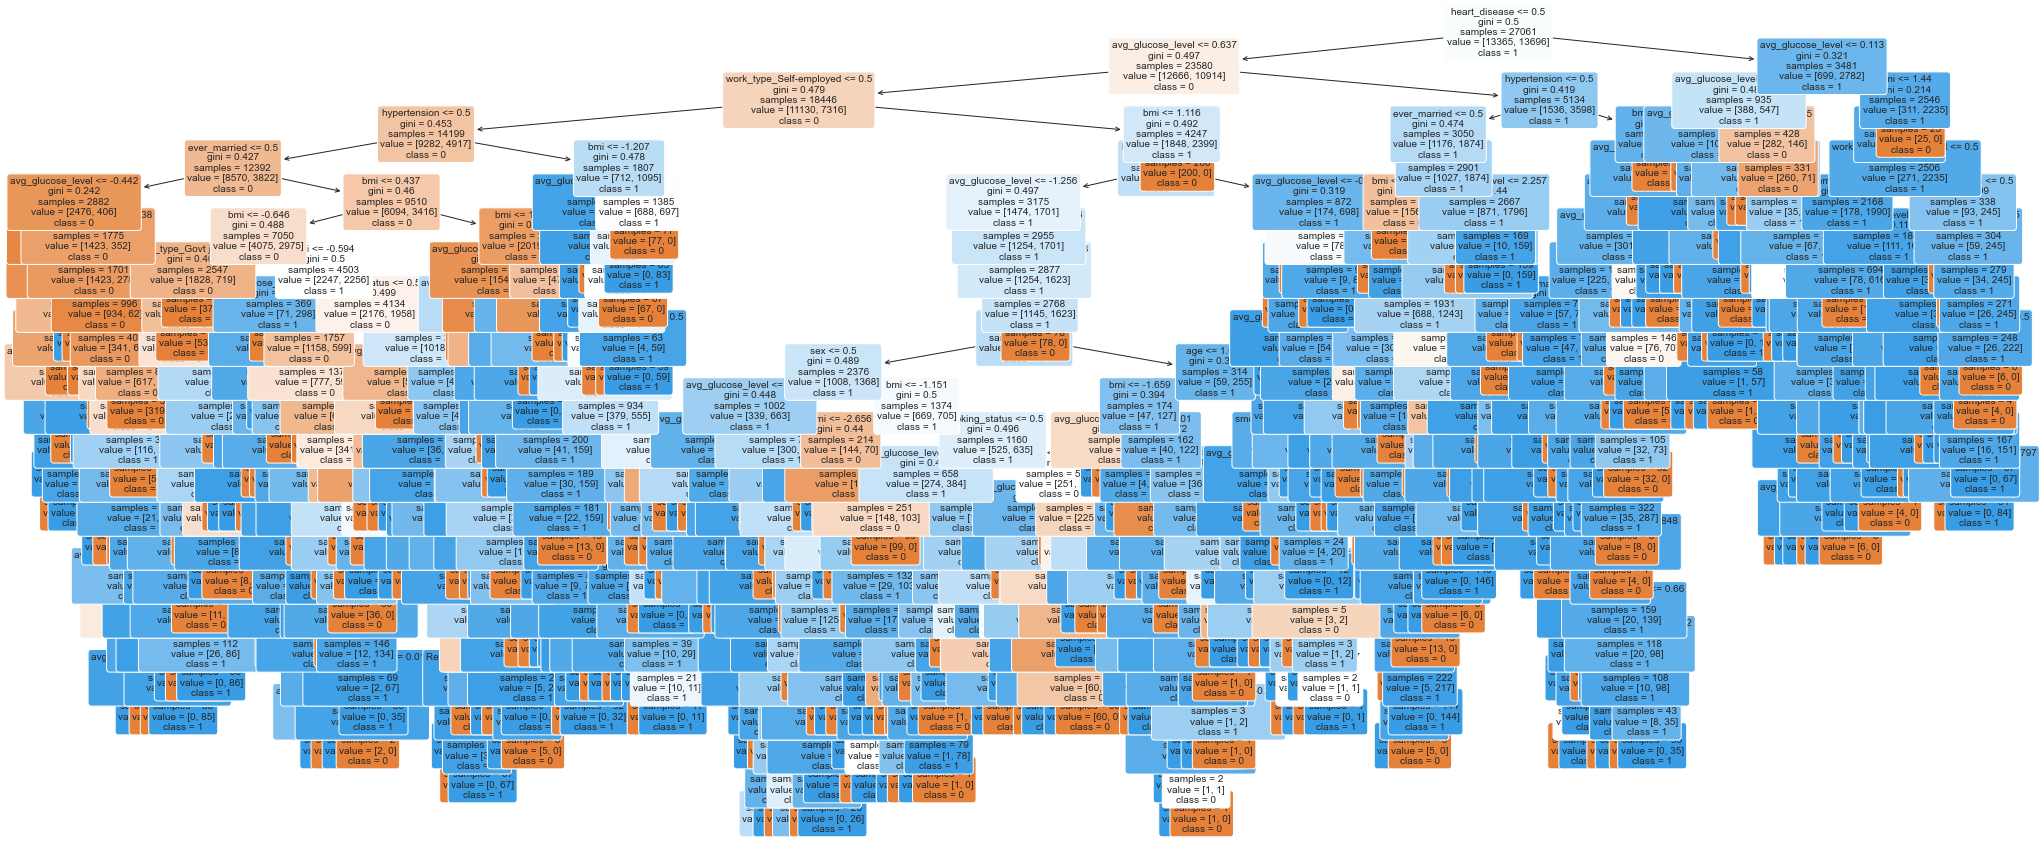

In [101]:
# Visualize the decision tree
plt.figure(figsize=(35, 15))
plot_tree(gridDT.best_estimator_, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)
plt.show()

In [91]:
results = train_evaluate_model(y_test)
results.index = ['Decision Tree']
results

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Decision Tree,0.996549,0.996606,0.994844,0.998374,0.996522,0.996522


C:\Users\Hari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


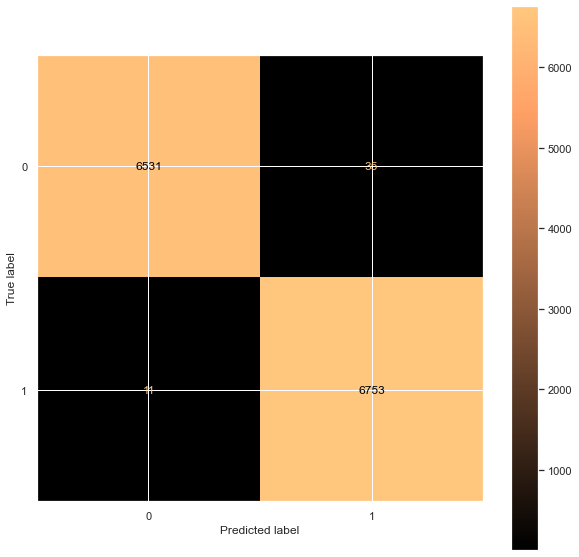

In [93]:
plot_confusion_matrix(gridDT,X_test,y_test,cmap = "copper")

## Support Vector Machine

In [94]:
param_grid = {'C': [1,10,100,1000], 
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']} 
    
gridSVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
    
# fitting the model for grid search
gridSVM.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.851 total time=  16.6s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.854 total time=  14.7s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.745 total time=  16.1s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.745 total time=  15.7s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.669 total time=  17.4s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.686 total time=  17.5s
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.677 total time=  19.8s
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.676 total time=  19.3s
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.888 total time=  13.7s
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.892 total time=  13.4s
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.790 total time=  15.2s
[CV 2/2] END .......C=10, gamma=0.1, kernel=rbf;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [95]:
# Getting the best parameters
print(gridSVM.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [96]:
# Prediction according to this model
y_pred_test = gridSVM.predict(X_test)
y_pred_train = gridSVM.predict(X_train)

In [98]:
# Overfit check
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.980414618824138
0.9525131282820705


In [99]:
# There is low overfitting, but the model results are good
resultsSVM = train_evaluate_model(y_test)
resultsSVM.index = ['Support Vector Machine']
results = results.append(resultsSVM)

In [107]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Decision Tree,0.996549,0.996606,0.994844,0.998374,0.996522,0.996522
Support Vector Machine,0.952513,0.954924,0.921143,0.991277,0.951929,0.951929


C:\Users\Hari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


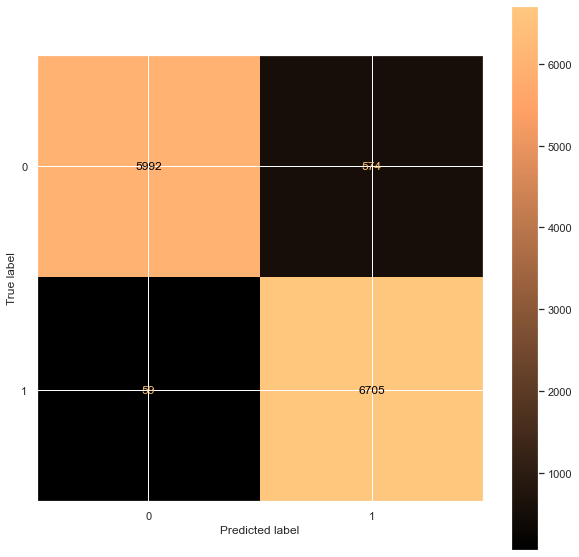

In [106]:
plot_confusion_matrix(gridSVM,X_test,y_test,cmap = "copper")

In [108]:
from sklearn.preprocessing import LabelEncoder

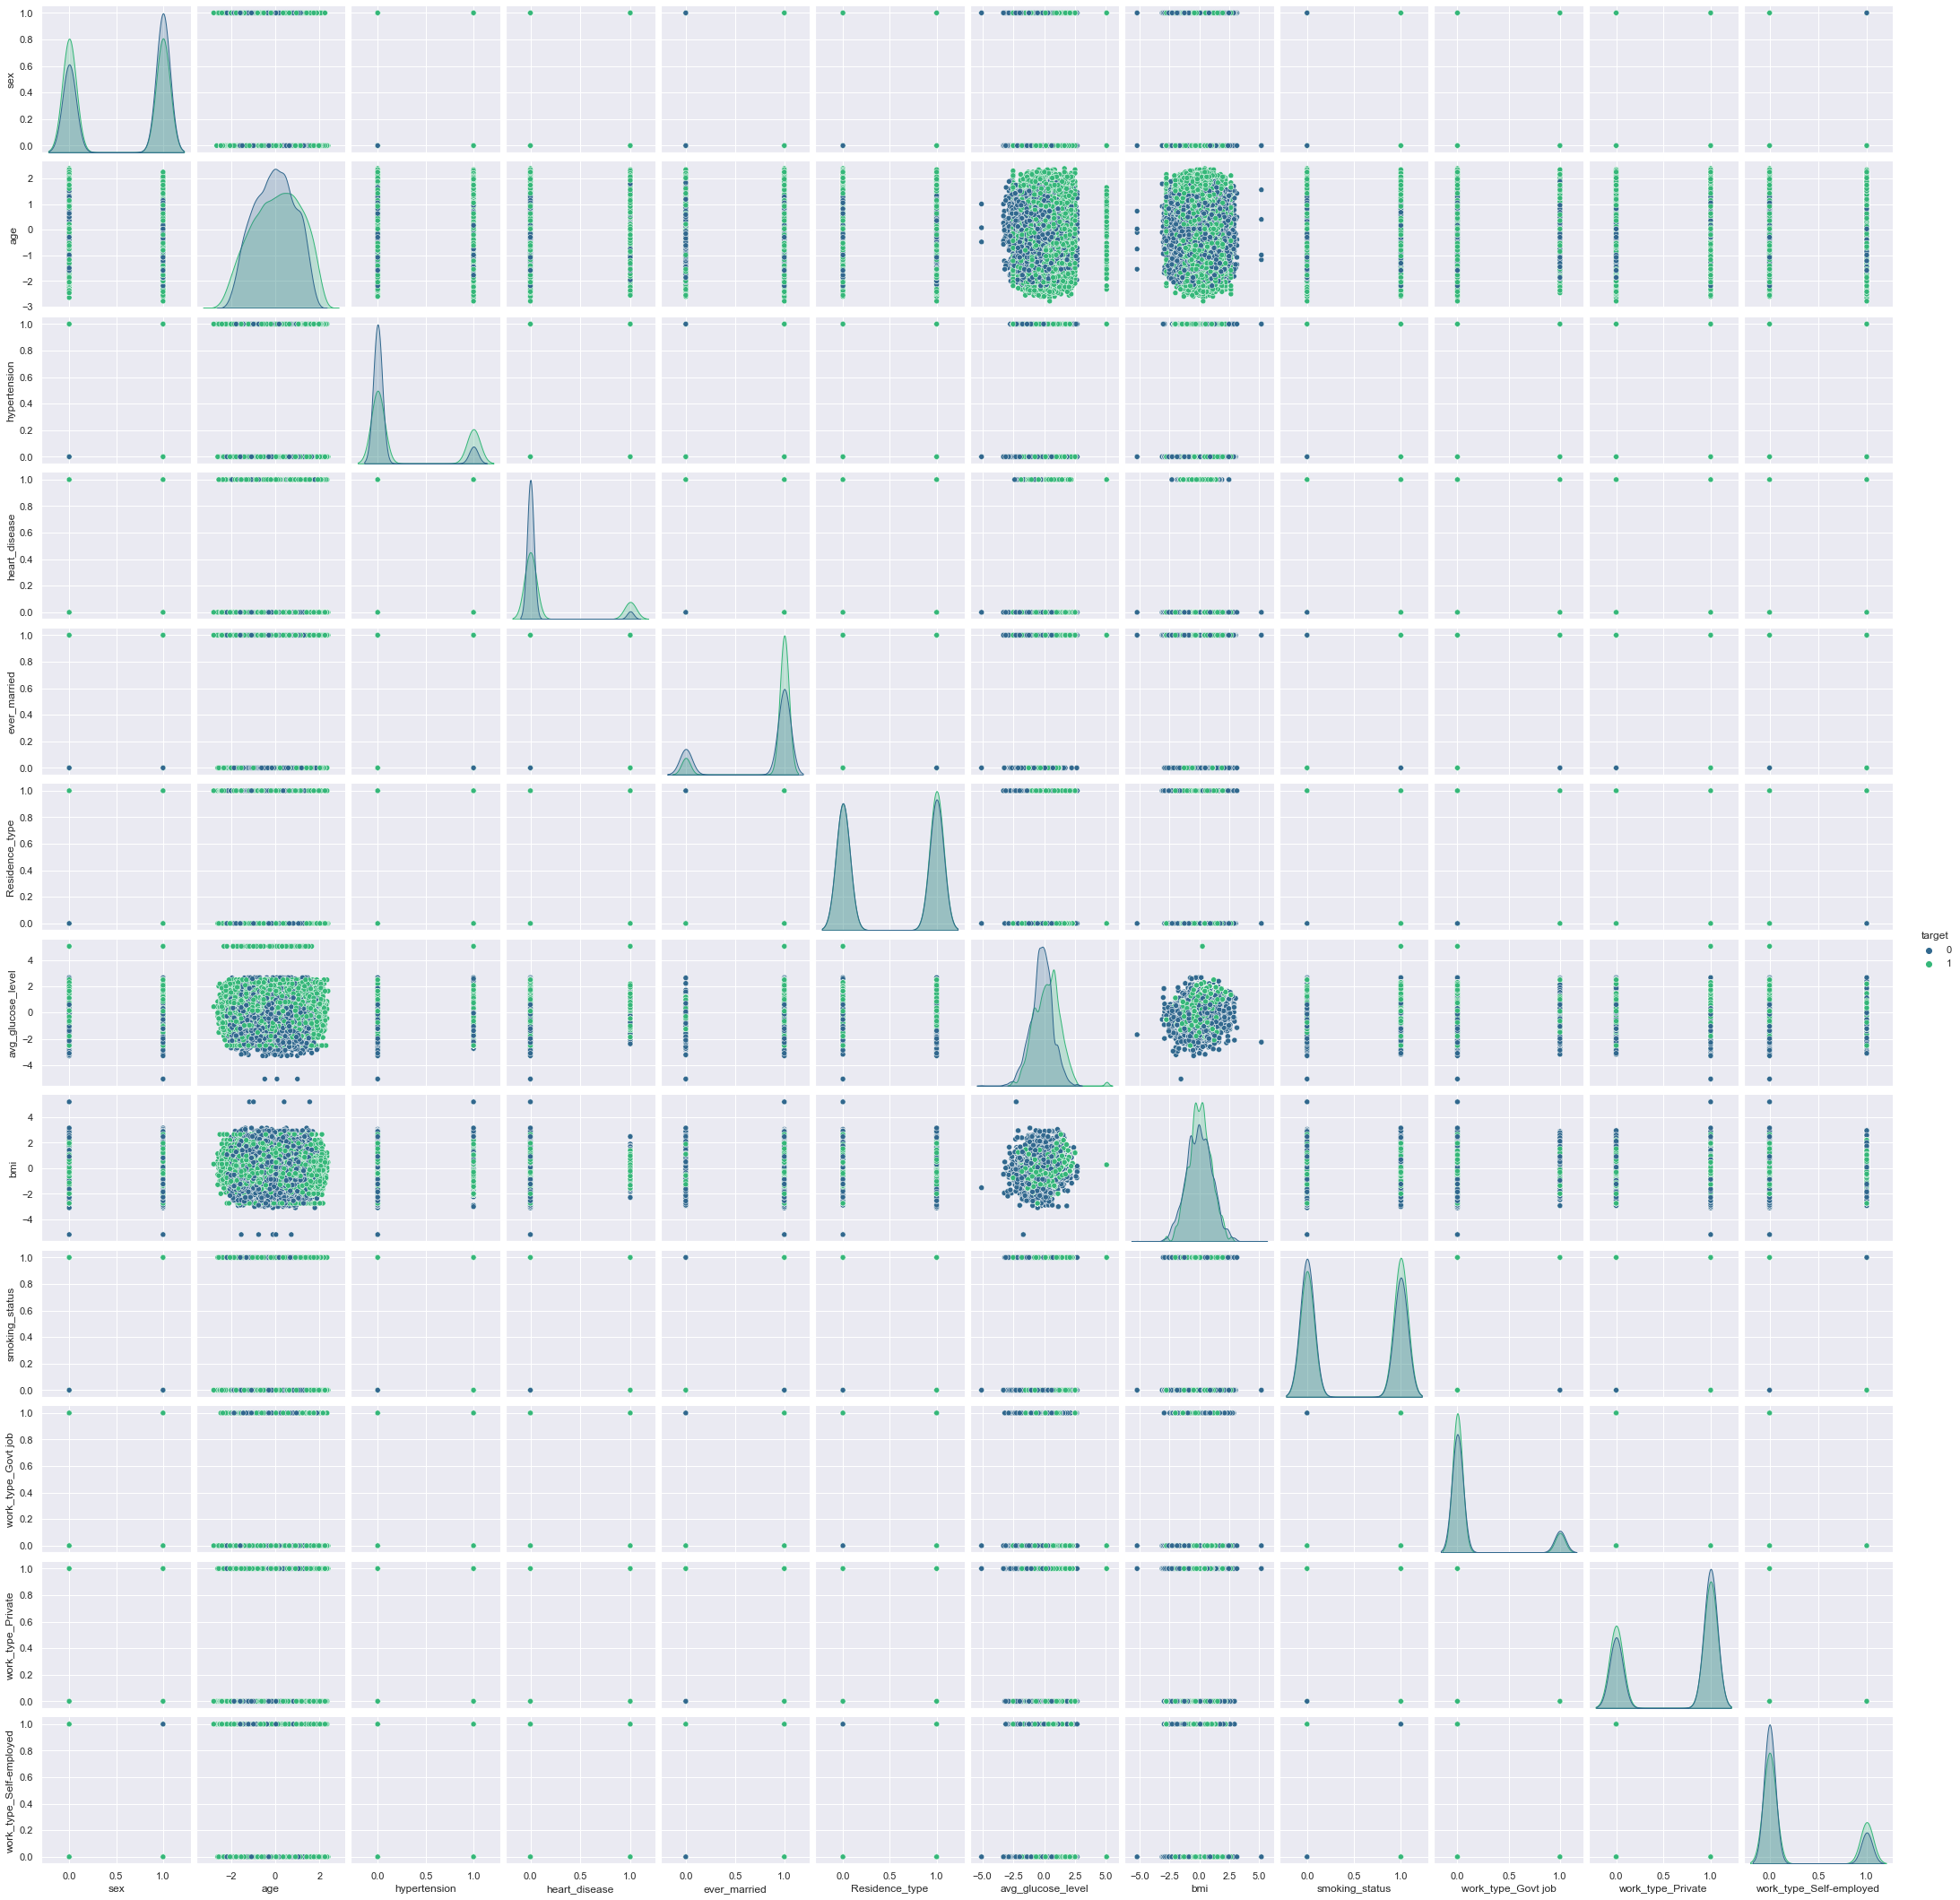

In [109]:
# Function to create pair plot with decision boundaries
def pair_plot_with_decision_boundaries(model, X, y):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Create a DataFrame from the training data
    df = pd.DataFrame(X, columns=X_train.columns)
    df['target'] = le.inverse_transform(y_encoded)

    # Create a pair plot
    sns.pairplot(df, hue='target', palette='viridis')
    plt.show()

# Visualize pair plot with decision boundaries
pair_plot_with_decision_boundaries(gridSVM.best_estimator_, X_train, y_train)

In [110]:
from sklearn.decomposition import PCA

In [112]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Visualize decision boundaries in the reduced space
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get the decision boundaries
Z = gridSVM.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Scatter plot of the reduced data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('SVM Decision Boundaries after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()